## Visualizing the Gender Gap in College Degrees

In this project we're going to be visualizing the differences in the percentage of men and women who major in the various STEM subjects, these indicated in the list stem_cats below.

In particular the focus of this project will be to express the data as clear as possible using a few different techniques, such as altering linewidths, altering colours, removing ticks, removing spines, setting appropriate and consistent graph limits, and so on.

Below is where we'll be starting from.

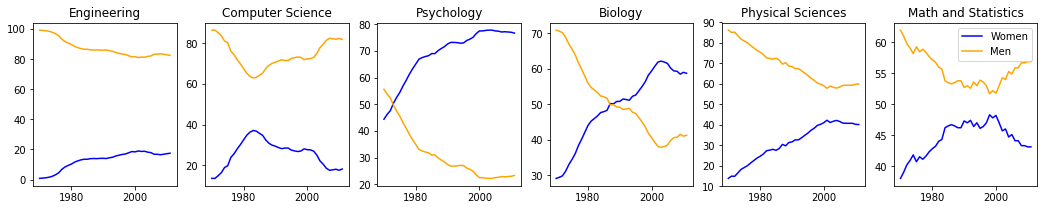

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= "blue", label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= "orange", label='Men')
    ax.set_title(stem_cats[sp])

plt.legend(loc = "upper right")
plt.show()

Ok, so these graphs aren't terrible, but there's a lot that could be improved. We'll go through it step by step. The first thing we can change is getting rid of the ticks on the graphs' axes. While the ticks may be helpful in some situations, here we're only interested in seeing the general trend regarding how gender gaps have changed over time, and in how the percentages of each gender in a particular major compare to one another. So let's remove those.

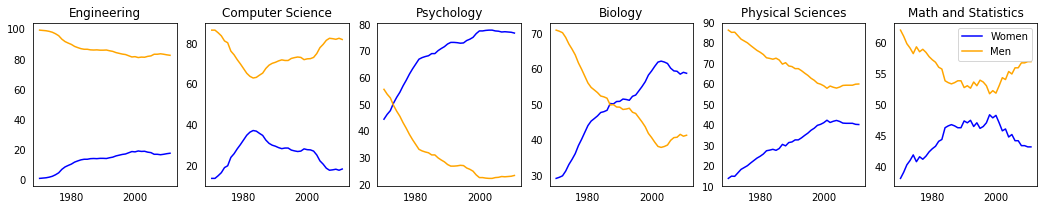

In [14]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= "blue", label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= "orange", label='Men')
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    #Removing x ticks from the graph by setting them to False.
plt.legend(loc = "upper right")
plt.show()

That's  cleaned up some of the unnecessary ink on the graph, but there's still more. We can get rid of the spines on the graphs as well. Again, they're just not really necessary for what we want to convey with the graph.

To do this, we could look at the dictionary of spines associated with the subplot with the command print(ax.spines). Once we can see the names of each spine (in this case, right, left, top, and bottom), we can remove them manually with ax.spines\["spine_name"\].set_visible(False). However, it's far easier to use a loop to iterate through the dict.items which will remove all spines without us needing to look at them. Of course, if for some reason we wanted to keep in one spine, we could do that also.

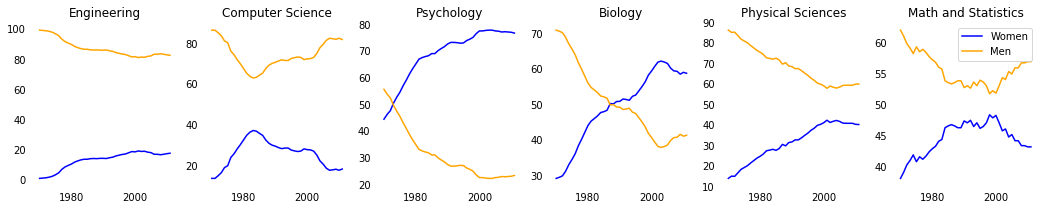

In [15]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= "blue", label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= "orange", label='Men')
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    # Removing spines from the graph by setting visible variable to False.
    
plt.legend(loc = "upper right")
plt.show()

The next big thing to sort out is the fact that the range of the y axis for every graph is different. While the range being automatically sized might be nice for one graph, it actually hinders our ability to convey the information in multiple graphs here. What we'd like is for the y-axis range to be the same in every graph (and the x-axis range too, but that's already the same in these graphs). Let's sort that out.

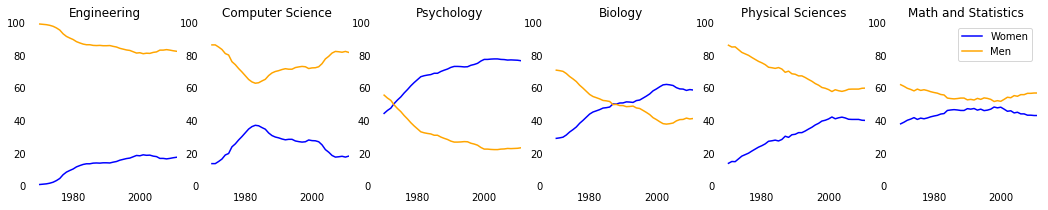

In [16]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= "blue", label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= "orange", label='Men')
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # Setting the upper and lower limits for the x and y axes.
    for key, spine in ax.spines.items():
        spine.set_visible(False)
        
plt.legend(loc = "upper right")
plt.show()

That's much better. Now we can easily compare each graph to the next. We can see much more clearly that Psychology has the highest percentage of women, and that Engineering has the lowest (although it's pretty close with Computer Science). A further incidental benefit of this is that we can actually use the y-axis labels on the graphs to the right of each line to more easily see the final values for each line. In the graphs above, this could actually be quite misleading.

Next, let's get rid of the legend on the top right of the last graph. It covers up some of the information on the last graph, and it's also quite a cumbersome way of expressing the information the legend contains. Another way to do it is to place labels on each of the lines individually. In fact, we probably don't need labels on every single line, so let's reduce the amount of ink on the plot further and label just the lines in the first a last graphs.

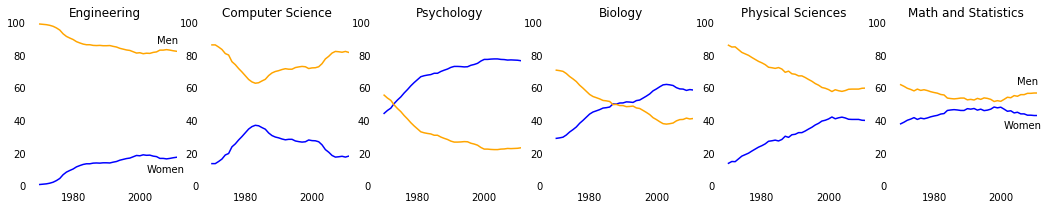

In [17]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= "blue", label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= "orange", label='Men')
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

    if sp == 0:
        ax.text(2005, 87, 'Men') #Adding labels to lines directly.
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

# Legend Removed
plt.show()

A minor improvement, but an improvement nonetheless - everything just looks that little bit cleaner.

The last two things we'll do is make the lines on our graphs easier to see. Right now, the lines are quite thin, and the colours aren't necessarily ideal for people with colour-blindness.

Right now, we're using the default colours from matplotlibs colour library. But Tableau have a colour palette - Color Blind 10 - containing colours ideal for those with colour-blindness. Let's use a couple of those (remembering to convert the RGB format numbers to decimals for matplotlib).

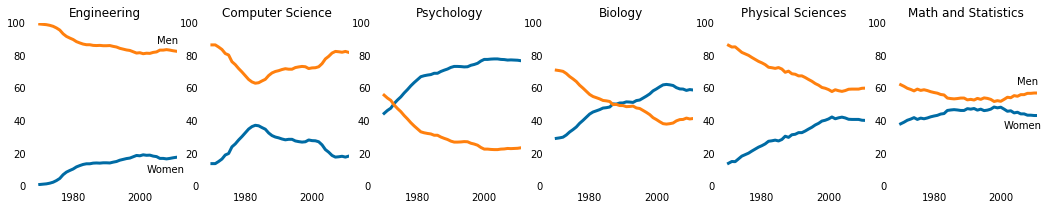

In [18]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
# Assigning the RGB colour code, altered for matplotlib, to variables.
# Alternatively, we could do this directly, but that means more code later on.

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

plt.show()

Ok, so we've got our plots for our STEM majors, but now let's get them for liberal arts majors and other majors as well.

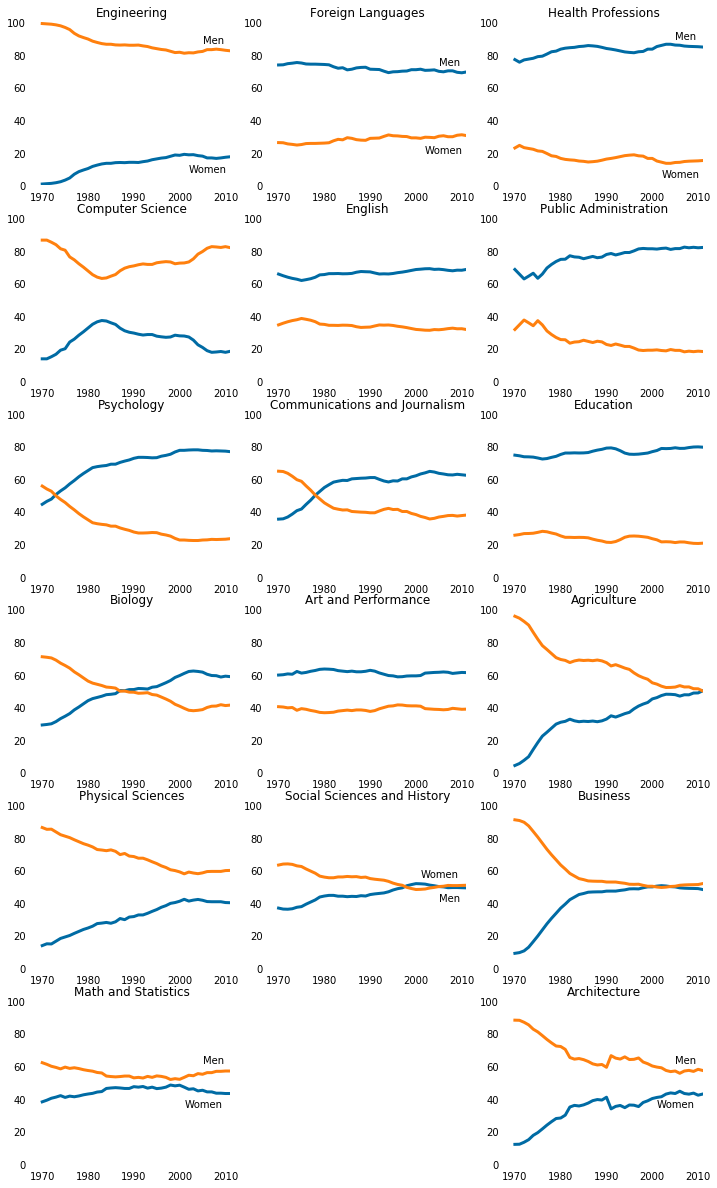

In [20]:
lib_arts_cats = ["Foreign Languages", "English", "Communications and Journalism", "Art and Performance", "Social Sciences and History"]
other_cats = ["Health Professions", "Public Administration", "Education", "Agriculture", "Business", "Architecture"]

fig = plt.figure(figsize=(12, 21))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 1))
    #Since we want these plots to be below one another, we need them to be placed at every third number in the grid
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

for sp in range(0, 5):
    ax = fig.add_subplot(6,3,(sp*3 + 2))
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 74, 'Men')
        ax.text(2002, 20, 'Women')
    if sp == 4:
        ax.text(2005, 41, 'Men')
        ax.text(2001, 56, 'Women')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 3))
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

plt.show()

Well, the information is there, but it's not presented as clearly as it could. A glaring issue is the space between the titles of the individual plots and the x-axis labels for the plot above it.

We can fix this by removing the x-axis labels for all but the bottom-most chart. That way the information is still present, but the space is far cleaner.

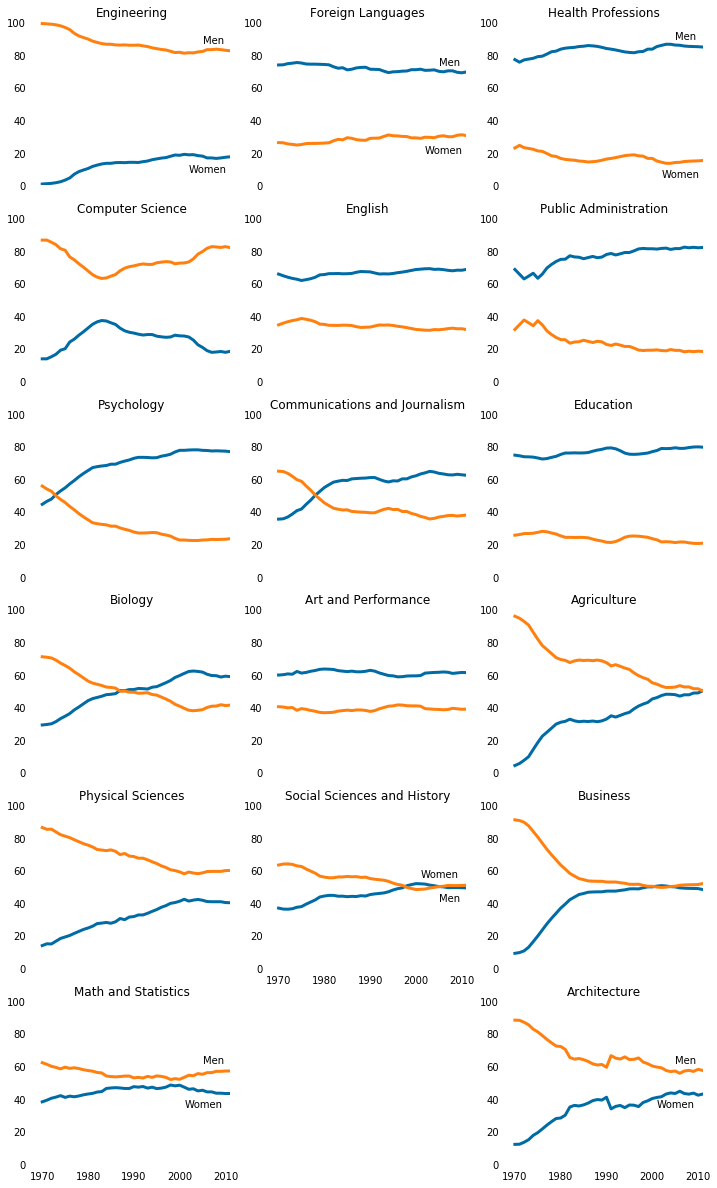

In [23]:
fig = plt.figure(figsize=(12, 21))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 1))
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False, labelbottom = False) #Switching off the x-axis labels for all of the plots
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom = True) # Switching the x-axis label back on for the bottom plot
for sp in range(0, 5):
    ax = fig.add_subplot(6,3,(sp*3 + 2))
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False, labelbottom = False) #Switching off the x-axis labels for all of the plots
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 74, 'Men')
        ax.text(2002, 20, 'Women')
    if sp == 4:
        ax.text(2005, 41, 'Men')
        ax.text(2001, 56, 'Women')
        ax.tick_params(labelbottom = True) # Switching the x-axis label back on for the bottom plot
for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 3))
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False, labelbottom = False) #Switching off the x-axis labels for all of the plots
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom = True) # Switching the x-axis label back on for the bottom plot
plt.show()

This looks much better - the plot space is now much less cluttered. One trade-off of course is that it's now harder to see in which years interesting changes occurred in each of the graphs, such as the sudden increase in women's graduation from Business at the start of the graph. However, we're looking for general trends right now, so that's a trade-off we're happy to make. This is particularly true given some of the choices we made earlier with the presentation of our plots (such as removing the x-ticks).

Next let's reduce some of the y-axis labels, keeping just those at 0 and 100. We may want to keep the one at 50 as well so that we have a marker for when the percentage of men and women graduating in a particular major is equal, or when it approaches equality.

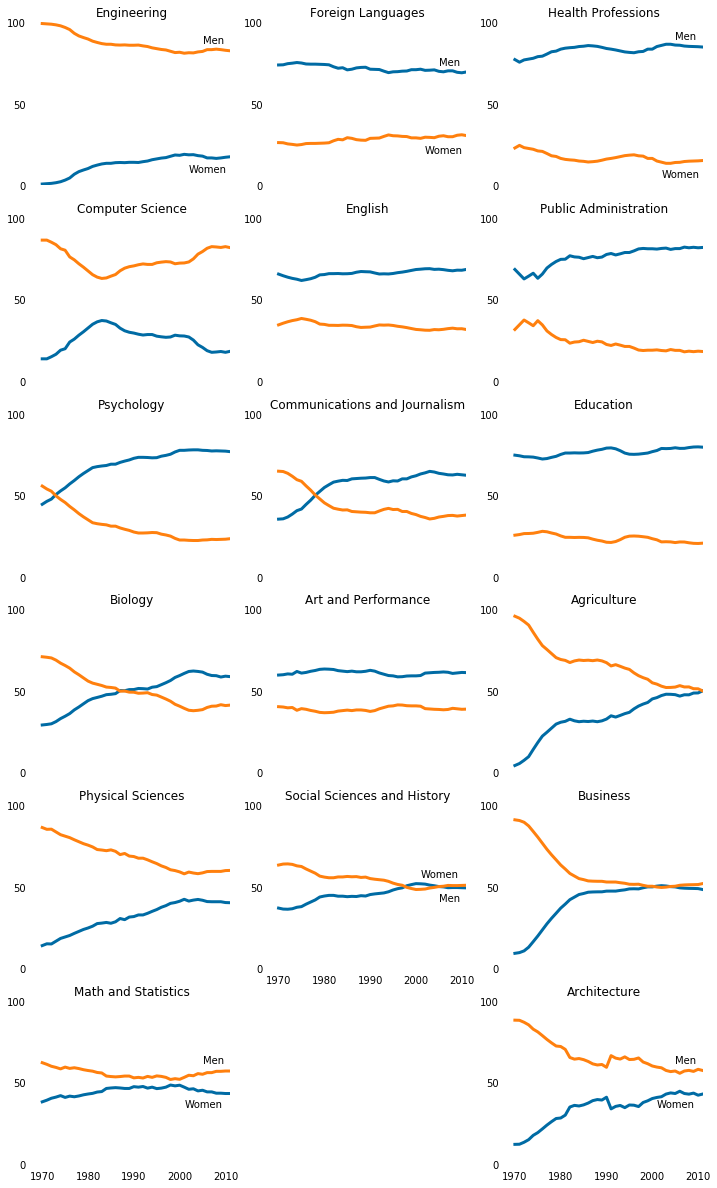

In [24]:
fig = plt.figure(figsize=(12, 21))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 1))
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False, labelbottom = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0, 50, 100]) #Setting the y ticks to the values we want to keep.
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom = True)
for sp in range(0, 5):
    ax = fig.add_subplot(6,3,(sp*3 + 2))
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False, labelbottom = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0, 50, 100]) #Setting the y ticks to the values we want to keep.
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 74, 'Men')
        ax.text(2002, 20, 'Women')
    if sp == 4:
        ax.text(2005, 41, 'Men')
        ax.text(2001, 56, 'Women')
        ax.tick_params(labelbottom = True)
for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 3))
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False, labelbottom = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0, 50, 100]) #Setting the y ticks to the values we want to keep.
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom = True)
plt.show()

That looks a little better, but we could indicate even more clearly when the lines approach equality by adding a y = 50 line. To make the line easier to see, we can use the next colour in the Color Blind 10 palette. To make sure it doesn't distract from the actual data, we can also increase its transparency.

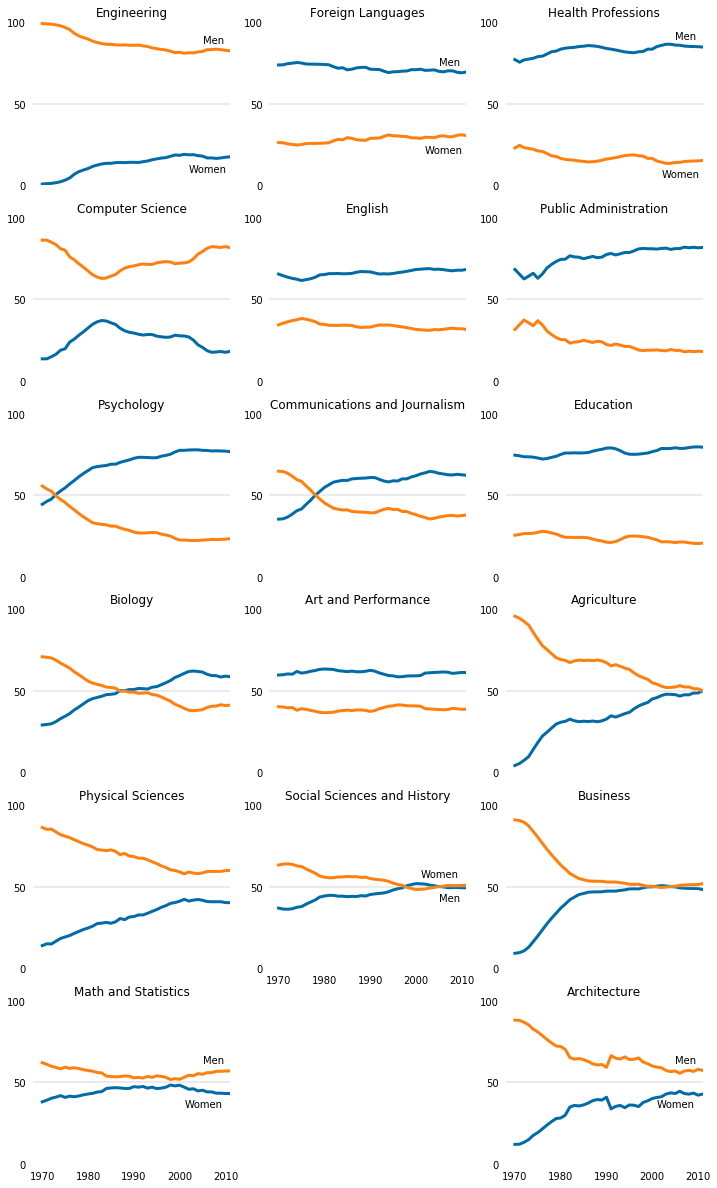

In [13]:
fig = plt.figure(figsize=(12, 21))

cb_grey = (171/255, 171/255, 171/255)

for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 1))
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False,
                  labelbottom = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0, 50, 100])
    ax.axhline(50, c=cb_grey, alpha = 0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom = True)
for sp in range(0, 5):
    ax = fig.add_subplot(6,3,(sp*3 + 2))
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False,
                  labelbottom = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0, 50, 100])
    ax.axhline(50, c=cb_grey, alpha = 0.3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 74, 'Men')
        ax.text(2002, 20, 'Women')
    if sp == 4:
        ax.text(2005, 41, 'Men')
        ax.text(2001, 56, 'Women')
        ax.tick_params(labelbottom = True)
for sp in range(0,6):
    ax = fig.add_subplot(6,3,(sp*3 + 3))
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c= cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c= cb_orange, label='Men', linewidth = 3)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom = False, top = False, right = False, left = False,
                  labelbottom = False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0, 50, 100])
    ax.axhline(50, c=cb_grey, alpha = 0.3)
    #We set the horizontal lines value to be at 50 and its colour to grey.
    #The alpha parameter specifies how transparent the line is, ranging between 0 and 1.
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    if sp == 0:
        ax.text(2005, 90, 'Men')
        ax.text(2002, 5, 'Women')
    if sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom = True)
plt.show()

Perfect! Now we can quickly identify general trends in the percentage of men and women in particular subjects with our graphs.